# Color Extraction from Clustering

In [2]:
import numpy as np
import cv2
import skimage.io as io
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans

(200, 200, 3)


/home/shubhijain/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


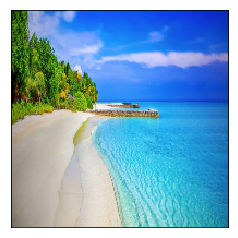

In [3]:
im = io.imread('../images/image2.jpeg')
im = cv2.resize(im, (200, 200))

plt.figure(0)
plt.grid("off")
plt.xticks([])
plt.yticks([])
plt.imshow(im)
print im.shape
plt.show()

In [4]:
data = im.reshape((-1, 3))
print data.shape

(40000, 3)


In [5]:
km = KMeans(n_clusters=64)

km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=64, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
dom_colors = km.cluster_centers_.astype(np.uint8)
print dom_colors.shape

(64, 3)


In [7]:
plt.figure(0)

for cx in range(dom_colors.shape[0]):
    plt.subplot(1, dom_colors.shape[0], cx + 1)
    plt.grid("off")
    plt.xticks([])
    plt.yticks([])
    col = np.zeros((50, 50, 3), dtype=np.uint8)
    col[:, :, :] = dom_colors[cx]
    plt.imshow(col)

[ 2 16  2 ... 50 50 50]
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=int32), array([ 947, 1039,  510, 1510,  582,  730,  945,  156,  628,  654,  475,
       1294,  500,  166,  877,  923,  317,  546,  635,  338,  138,  523,
        401,  966,  504, 1293,  695,  504,  185,  501,  731,  522, 1191,
        896,  420,  875, 1175,  690,  435, 1229,  813,  450,  519,  286,
        188,  797,  942,  456,  451,  414,  355,  264,  238,  952,  998,
        504, 1192,  234,  659,  358,  119,  147,  180,  838]))


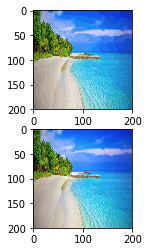

In [14]:
new_img = np.zeros_like(data)
#the predict function predicts the cluster centers for each point in the data
labels = km.predict(data)
print labels

print np.unique(labels, return_counts=True)

#assigning the new colours
for ix in range(new_img.shape[0]):
    new_img[ix, :] = dom_colors[labels[ix]]

plt.subplot(2, 1, 1)
plt.grid("off")
plt.imshow(new_img.reshape(im.shape))

plt.subplot( 2,1, 2)
plt.grid("off")
plt.imshow(im)

# 